# Importation des librairies nécéssaire à notre étude de cas

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import missingno as mno
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Chargement de mon Dataset et Pré-traitement

In [9]:
Heart_DF = pd.read_csv("heart.dat", sep="\s+", names = ['AGE','SEX','CHEST PAIN','Blood Pressure','Cholestoral',
                             'Blood Sugar','ElectroCardiographic','Heart Rate Achieved',
                             'Induced Angina','Oldpeak','The Slope of the Peak','Ca',
                             'Thal','Target']
)

In [10]:
Heart_DF.head()

,AGE,SEX,CHEST PAIN,Blood Pressure,Cholestoral,Blood Sugar,ElectroCardiographic,Heart Rate Achieved,Induced Angina,Oldpeak,The Slope of the Peak,Ca,Thal,Target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [17]:
#Heart_DF.info()
Heart_DF.isnull().sum()

AGE                      0
SEX                      0
CHEST PAIN               0
Blood Pressure           0
Cholestoral              0
Blood Sugar              0
ElectroCardiographic     0
Heart Rate Achieved      0
Induced Angina           0
Oldpeak                  0
The Slope of the Peak    0
Ca                       0
Thal                     0
Target                   0
dtype: int64

<AxesSubplot:>

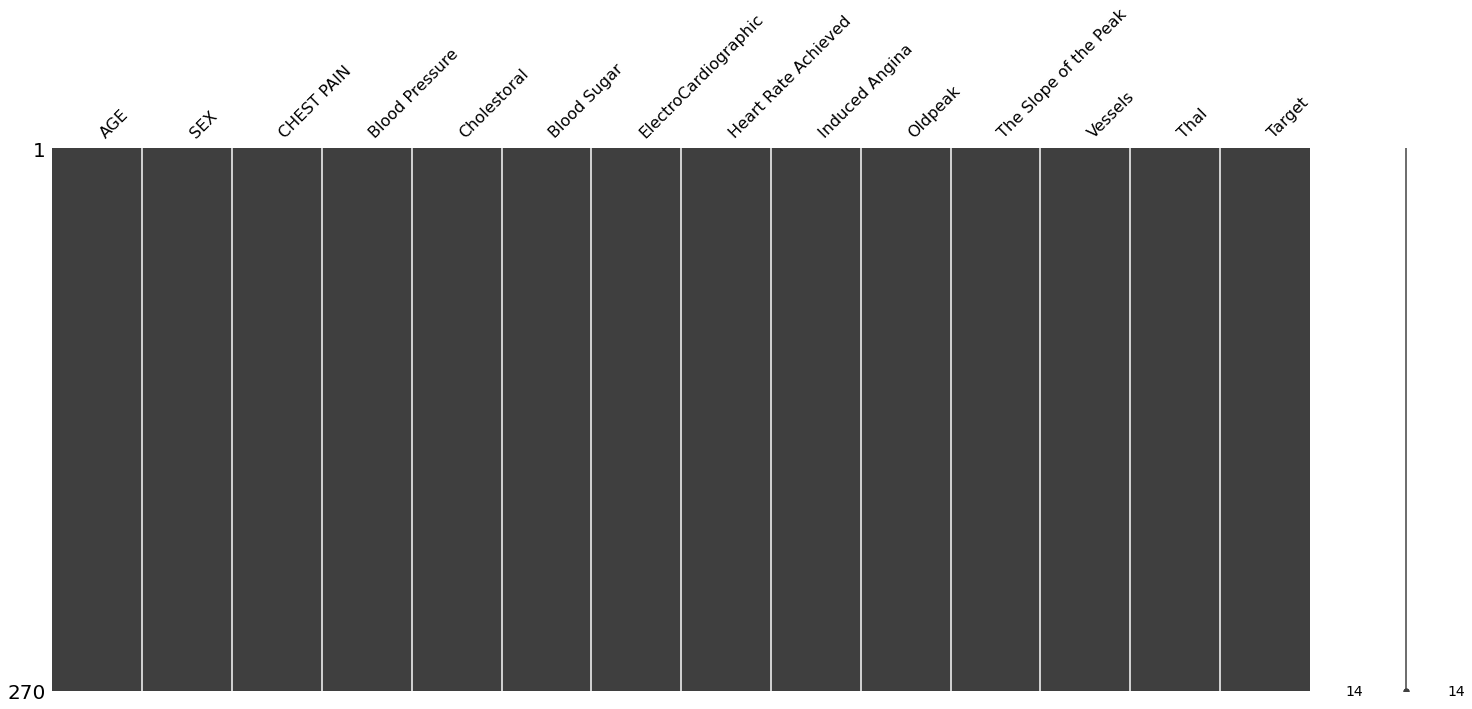

In [116]:
mno.matrix(Heart_DF)

# Analyse des données

1    150
2    120
Name: Target, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Target'>

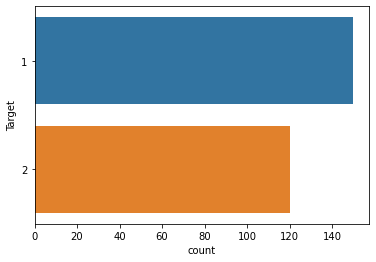

In [117]:
# Répartition graphique de la maladie dans la population
print(Heart_DF.Target.value_counts())
sns.countplot(y="Target", data=Heart_DF)

<AxesSubplot:xlabel='Target', ylabel='AGE'>

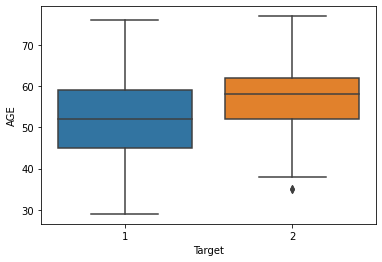

In [110]:
# Répartition graphique des malades selon leur age
sns.boxplot(x='Target',y='AGE',data=Heart_DF)

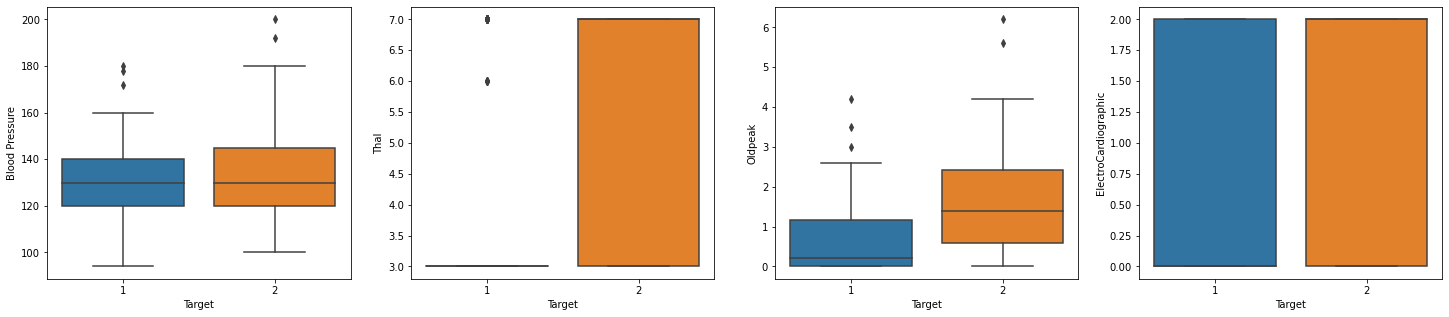

In [23]:
# Répartition graphique des parametres de risque de cardiaque en fonction de l'objet etudié
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Target',y='Blood Pressure',data=Heart_DF)
plt.subplot(1,4,3)
sns.boxplot(x='Target',y='Oldpeak',data=Heart_DF)
plt.subplot(1,4,4)
sns.boxplot(x='Target',y='ElectroCardiographic',data=Heart_DF)
plt.subplot(1,4,2)
sns.boxplot(x='Target',y='Thal',data=Heart_DF);

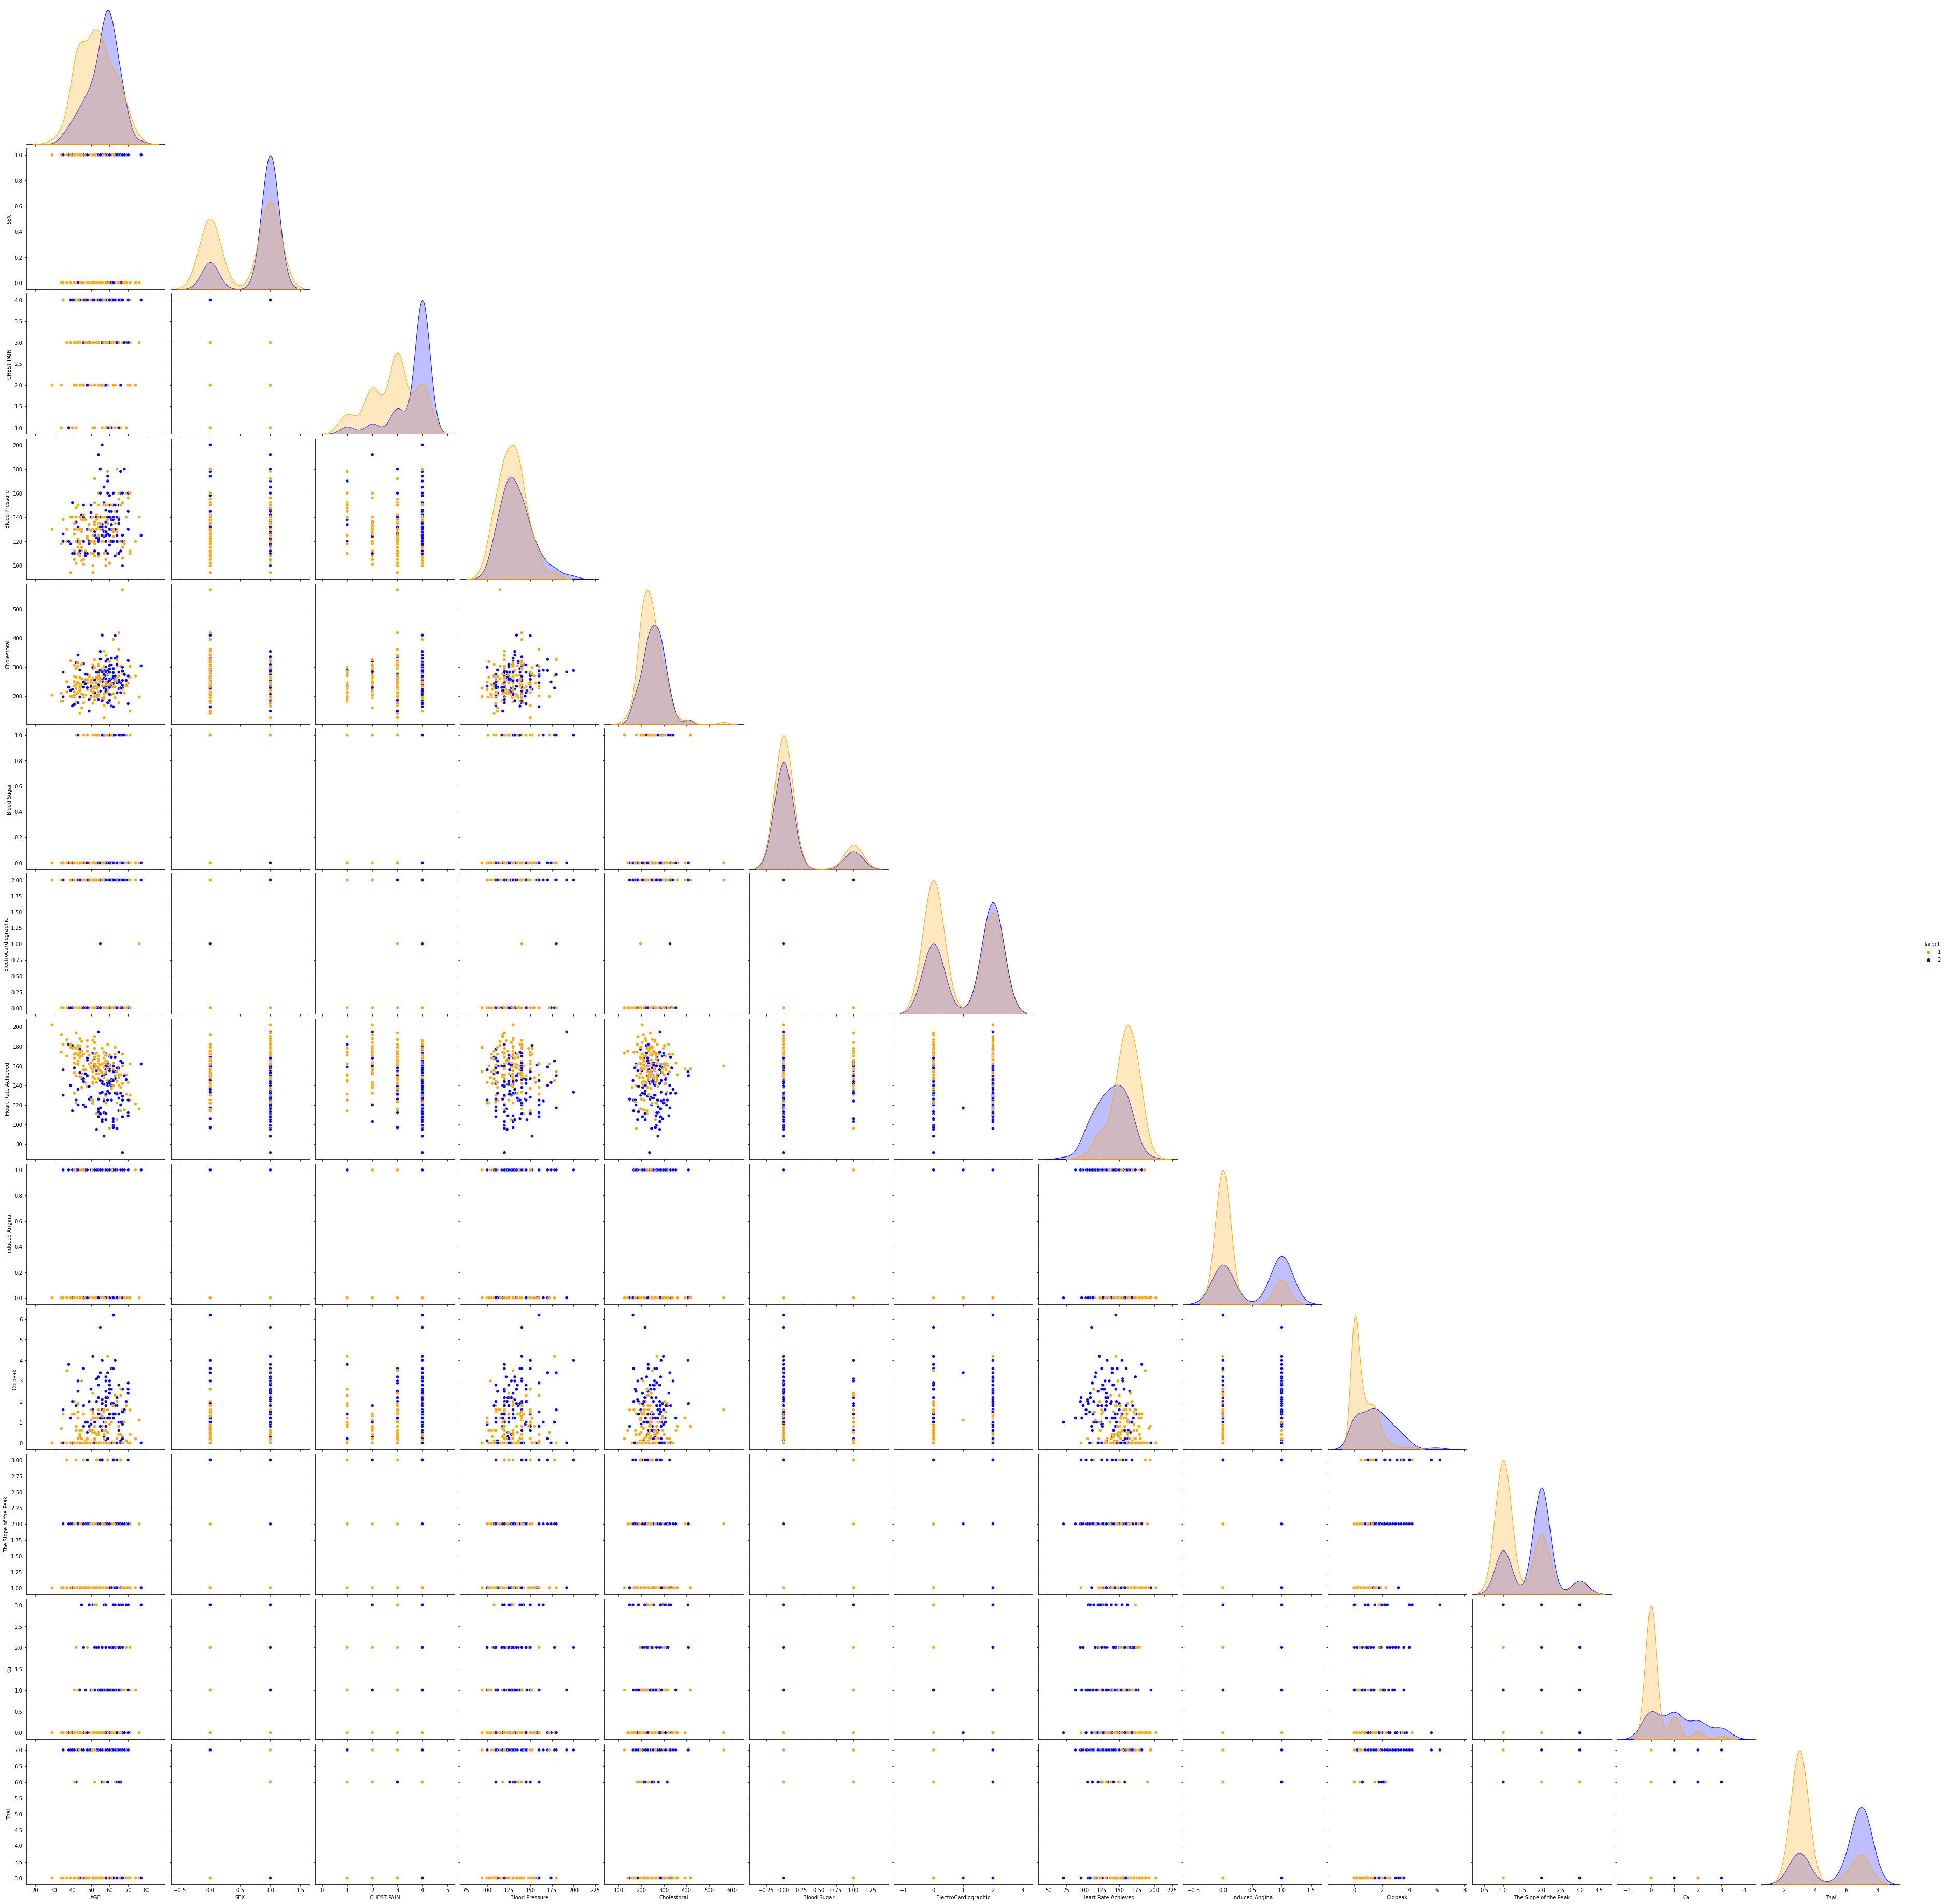

In [26]:
# Répartition graphique des combinaisons de variables 2 à 2
sns.pairplot(Heart_DF, hue='Target', corner = True, palette = ['orange', 'blue'], height=4)

<AxesSubplot:>

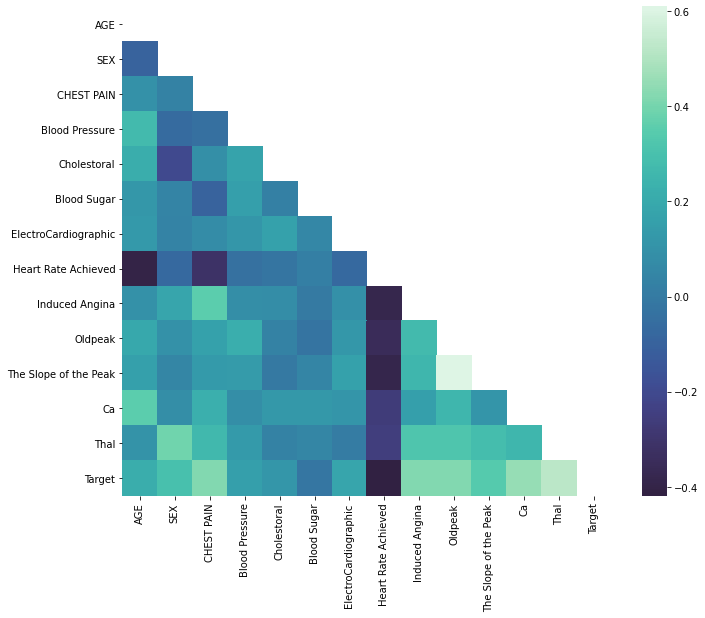

In [13]:
# Matrice de corrélations
Pima_corr = Heart_DF.corr()
# masque triangulaire
mask = np.triu(np.ones_like(Pima_corr, dtype=bool))
# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))
# matrice de corrélation avec masque trinagulaire inférieur
sns.heatmap(Pima_corr, mask=mask, cmap = 'mako', center=0, square=True)

# Mise en place d’une procedure d’apprentissage

# Strategie 1 : Ensemble d’apprentissage, de validation et de test

In [88]:
#decoupage de mon jeu de données en deux parties
X = Heart_DF.drop(['Target'], axis=1)
y = Heart_DF['Target']

In [89]:
p_k = [1, 5, 10, 15, 20, 25]

In [90]:
#train_test_split
# x_av = x apprentissage et validation # X_t = x teste
X_av, X_t, y_av, y_t = train_test_split(X, y, test_size=0.2)

In [91]:
X_a, X_v, y_a, y_v = train_test_split(X_av, y_av)

In [92]:
#Normalisation
Stdcandler2 = StandardScaler()

In [93]:
Stdcandler2.fit(X_a)

StandardScaler()

In [96]:
X_a_std=Stdcandler2.transform(X_a)

In [36]:
X_v_std = Stdcandler2.transform(X_v)

In [37]:
X_t_std = Stdcandler2.transform(X_t)

## Application de l'algorithme k_nn pour chaque valeur de P_K puis evaluer l'erreur en apprentissage et en validation

In [109]:
Erreur_A = []
Erreur_V = []
#Erreur_T = []
for i in p_k:
    #je crée un objet KNeighborsClassifier pour chaque valeur de i
    neigh = KNeighborsClassifier(n_neighbors=i)
    # apprentissage des parametres de mon objet sur mon jeu de données d'entrainement X_a
    neigh.fit(X_a_std, y_a)
    # je mesure mon score d'apprentissage sur mes données test
    score_A = neigh.score(X_t_std, y_t)
    # je mesure mon score sur mes données de validation
    score_V = neigh.score(X_v_std, y_v)
    #score_T = neigh.score(X_t_std, y_t)
    Erreur_A.append(score_A)
    Erreur_V.append(score_V)
    #Erreur_T.append(score_T)
    #print(Erreur_A)
    #print(Erreur_V)

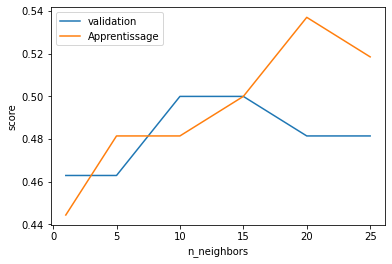

In [110]:
#graphic
plt.plot(p_k, Erreur_V, label='validation')
plt.plot(p_k, Erreur_A, label='Apprentissage')
#plt.plot(p_k, Erreur_T, label='Test')
plt.ylabel('score')
plt.xlabel('n_neighbors')

plt.legend()

In [132]:
 neigh10 = KNeighborsClassifier(n_neighbors=10)

In [133]:
neigh5.fit(X_a_std, y_a)

KNeighborsClassifier()

In [134]:
y_pred = neigh5.predict(X_t_std)

In [135]:
y_pred

array([1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score(y_t, y_pred)

0.48148148148148145

In [51]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.55      0.55        31
           2       0.39      0.39      0.39        23

    accuracy                           0.48        54
   macro avg       0.47      0.47      0.47        54
weighted avg       0.48      0.48      0.48        54



In [53]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_t, y_pred)

array([[17, 14],
       [14,  9]], dtype=int64)

In [73]:
roc_auc_score(y_t, y_pred)

0.7037037037037037

In [55]:
neigh20 = KNeighborsClassifier(n_neighbors=20)

In [56]:
neigh20.fit(X_a_std, y_a)

KNeighborsClassifier(n_neighbors=20)

In [57]:
y_pred2 = neigh20.predict(X_t_std)

In [58]:
y_pred2

array([1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1], dtype=int64)

In [60]:
accuracy_score(y_t, y_pred2)

0.7037037037037037

In [61]:
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75        27
           2       0.82      0.52      0.64        27

    accuracy                           0.70        54
   macro avg       0.74      0.70      0.69        54
weighted avg       0.74      0.70      0.69        54



In [62]:
confusion_matrix(y_t, y_pred)

array([[24,  3],
       [13, 14]], dtype=int64)

In [72]:
roc_auc_score(y_t, y_pred2)

0.7037037037037037

## Adaptation des metriques

# 5*FN + FP / N

In [156]:
c=confusion_matrix(y_t, y_pred)

SyntaxError: invalid syntax (<ipython-input-156-4965bab4917a>, line 2)

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [17, 14,  0,  0],
       [14,  9,  0,  0]], dtype=int64)

# Strategie 2: Validation croisée

In [74]:
#decoupage de mon jeu de données en deux parties
X = Heart_DF.drop(['Target'], axis=1)
y = Heart_DF['Target']

In [75]:
X.shape

(270, 13)

In [76]:
y.shape

(270,)

In [77]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Normalisons nos jeu de données

In [78]:
#creation de mon standardiseur
StdScaler = StandardScaler()

In [79]:
StdScaler.fit(X_train)

StandardScaler()

In [80]:
X_train_std = StdScaler.transform(X_train)

In [81]:
X_test_std = StdScaler.transform(X_test)

In [82]:
# Fixer l'intervalle des valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':np.arange(1, 20),
             'metric' : ['euclidean', 'manhattan']}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [83]:
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [84]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [85]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'euclidean', 'n_neighbors': 9}


In [86]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Résultats de la validation croisée :
accuracy = 0.773 (+/-0.121) for {'metric': 'euclidean', 'n_neighbors': 1}
accuracy = 0.782 (+/-0.110) for {'metric': 'euclidean', 'n_neighbors': 2}
accuracy = 0.814 (+/-0.123) for {'metric': 'euclidean', 'n_neighbors': 3}
accuracy = 0.810 (+/-0.101) for {'metric': 'euclidean', 'n_neighbors': 4}
accuracy = 0.814 (+/-0.175) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.819 (+/-0.137) for {'metric': 'euclidean', 'n_neighbors': 6}
accuracy = 0.824 (+/-0.158) for {'metric': 'euclidean', 'n_neighbors': 7}
accuracy = 0.828 (+/-0.169) for {'metric': 'euclidean', 'n_neighbors': 8}
accuracy = 0.847 (+/-0.147) for {'metric': 'euclidean', 'n_neighbors': 9}
accuracy = 0.842 (+/-0.137) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.842 (+/-0.137) for {'metric': 'euclidean', 'n_neighbors': 11}
accuracy = 0.842 (+/-0.137) for {'metric': 'euclidean', 'n_neighbors': 12}
accuracy = 0.842 (+/-0.109) for {'metric': 'euclidean', 'n_neighbors': 1

In [87]:
#la performance sur le jeu de test
y_pred_test = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred_test)))



Sur le jeu de test : 0.870
